In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données

In [3]:
path = '/home/dj/Téléchargements/'

In [4]:
train16 = pd.read_csv(path+'all/train_2016_v2.csv', sep=',', header='infer') 

In [5]:
X16 = pd.read_csv(path+'all/properties_2016.csv', sep=',', header='infer') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train16.head(2)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01


In [7]:
X16.head(2)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN


# Exploration des données

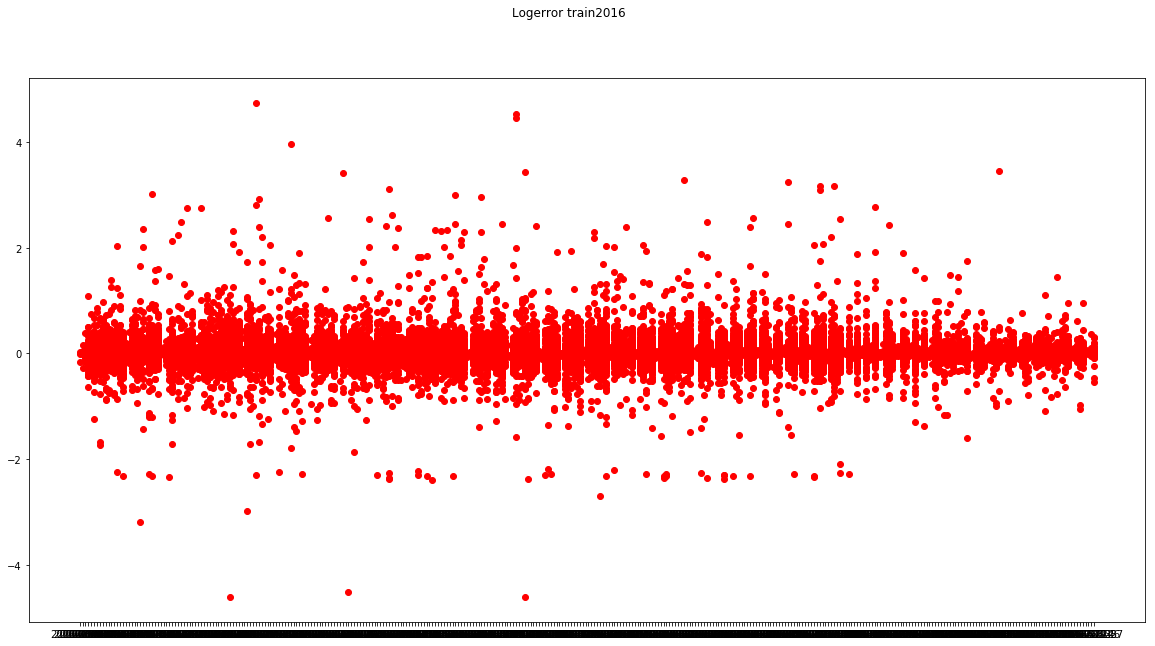

In [8]:
plt.figure(figsize=(20,10))
plt.plot(train16.transactiondate, train16.logerror, 'ro')
plt.suptitle('Logerror train2016')
plt.show()

Le logerror sur les biens vendus en 2016 se situ entre -4.65 et 5.26 avec une moyenne de 0.0167, cependant le nuage de points ci-dessus nous indique la présence d'ouliers et on remarque donc que le logerror se situ réellement entre environ -3 et +3 (nous allons affiner l'analyse par la suite)

Nous remarquons aussi que le logerror est faible à nul sur un intervale relativement régulier, s'agit-il des jours de weekend où les transactions immoblières ne sont pas enregistrées ? vérifions cela plus tard. 

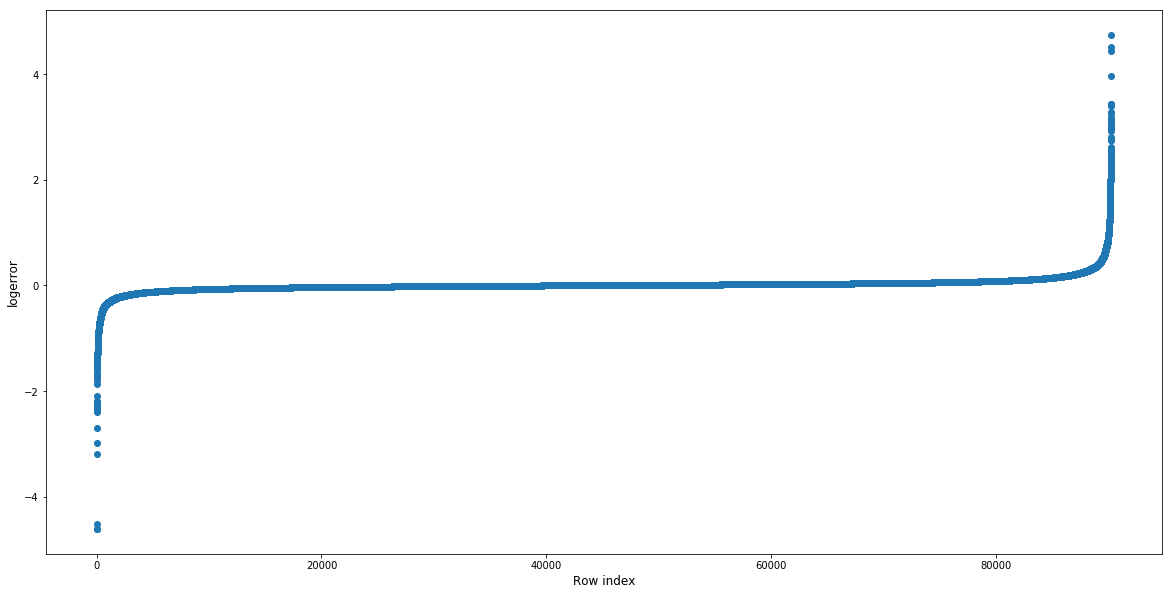

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(range(train16.shape[0]), np.sort(train16.logerror.values))
plt.xlabel('Row index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

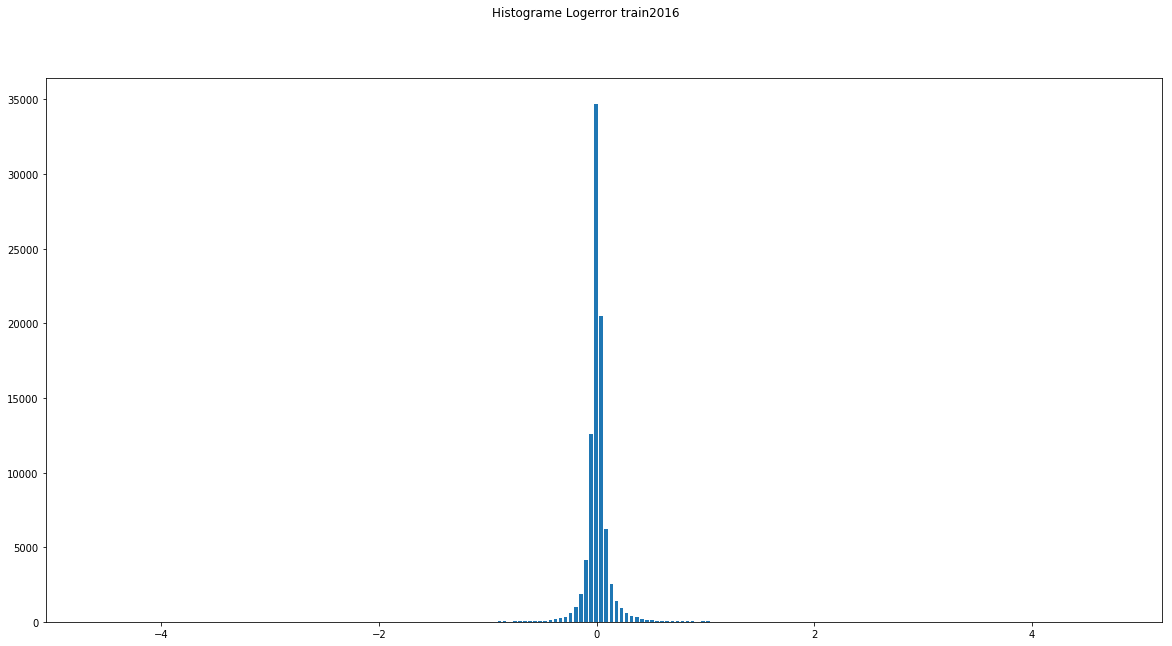

In [19]:
hist, bins = np.histogram(train16.logerror.values, bins=200)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(20,10))
plt.bar(center, hist, align='center', width=width)
plt.suptitle('Histograme Logerror train2016')
plt.show()

On remarque une distribution de forme gaussienne du logerror avec une médiane autour du 0 et un écart type faible.

> Remarque 1 : 
>> L'alogithme de Zillow prédit assez bien les valeures immoblières avec un taux d'erreur qui gravite autour de 0, avec une répartition équilibrée des valeures surestimées et des valeurs sous-estimées 

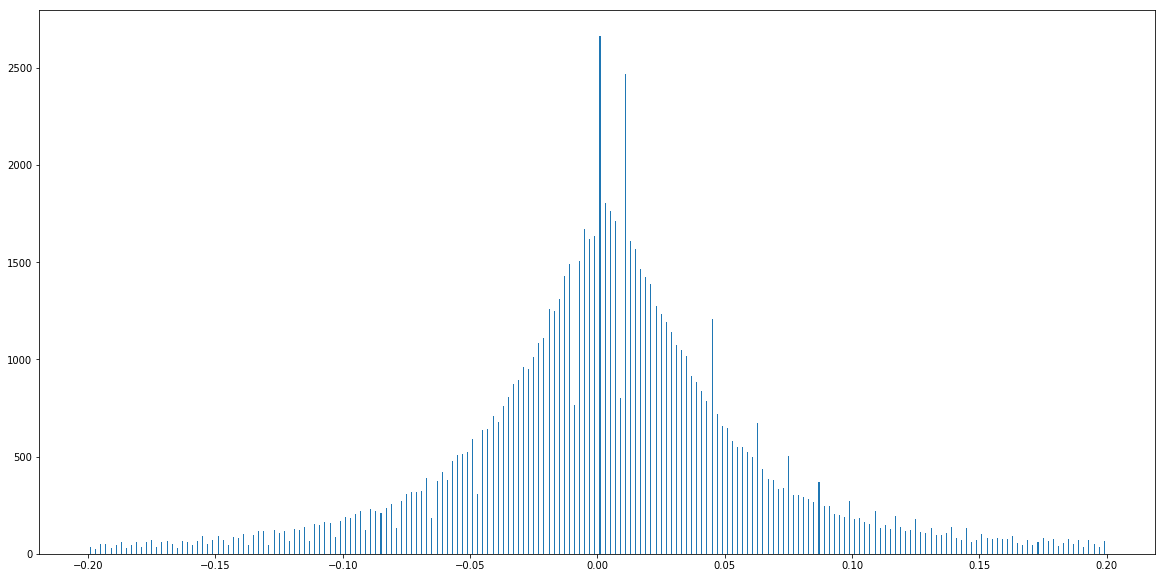

In [23]:
rangeMin,rangeMax = -0.2, 0.2
hist, bins = np.histogram(train16.logerror.values, bins=200, range=(rangeMin,rangeMax))
width = 0.2 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(20,10))
plt.bar(center, hist, align='center', width=width)
plt.show()

# Préparation / Nettoyage des données 

A présent nous allons fusionner les 2 DF train et properties

In [49]:
X16 = pd.merge(train16, X16, on='parcelid', suffixes=('', ''))

In [51]:
X16.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [31]:
X16.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

In [57]:
X16.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


Nous remarquons la présence de valeurs manquantes dans le DF, procédons à une analyse des valeurs manquantes : 

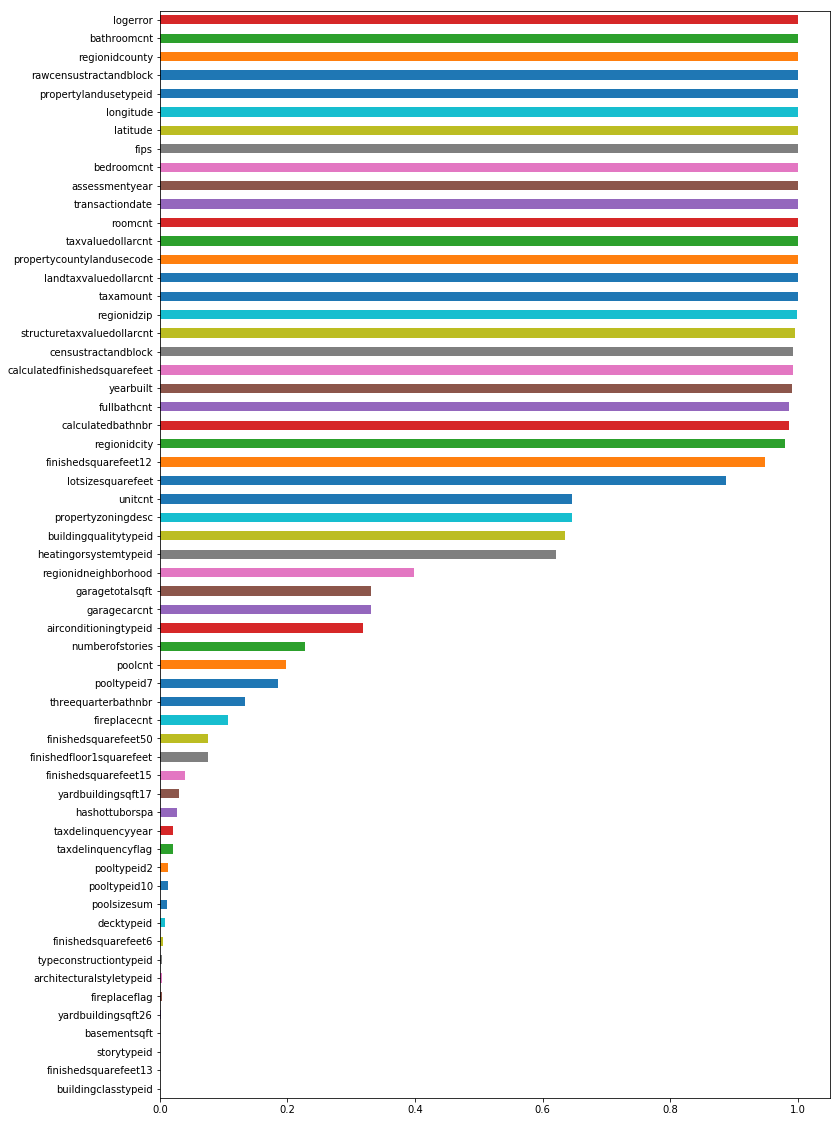

In [58]:
plt.figure(figsize=(12,20))
X16.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')

On remarque du diagram de bars horizontal que pour presque la moitié des variables plus de 50% des données sont manquantes, 

Procédons donc au comptage des données manquantes :

In [64]:
# Calcul du nombre de données manquantes par colonne
X16_missing = X16.isnull().sum(axis=0).reset_index()
X16_missing.columns = ['column_name', 'missing_count']
X16_missing = X16_missing.sort_values(by='missing_count')

# Calcul du pourcentage des données manquantes
X16_missing['missing_rate'] = X16_missing['missing_count']/ X16.parcelid.count()
X16_missing = X16_missing.sort_values(by='missing_rate')
X16_missing.head

<bound method NDFrame.head of                      column_name  missing_count  missing_rate
0                       parcelid              0      0.000000
27                     longitude              0      0.000000
35         propertylandusetypeid              0      0.000000
37        rawcensustractandblock              0      0.000000
39                regionidcounty              0      0.000000
42                       roomcnt              0      0.000000
26                      latitude              0      0.000000
19                          fips              0      0.000000
6                    bathroomcnt              0      0.000000
54                assessmentyear              0      0.000000
2                transactiondate              0      0.000000
1                       logerror              0      0.000000
7                     bedroomcnt              0      0.000000
34     propertycountylandusecode              1      0.000011
55         landtaxvaluedollarcnt        

In [65]:
missing_pct = 0.8
X16.drop(X16_missing[(X16_missing.missing_rate>=missing_pct)].column_name.values.tolist(),
                    axis=1,inplace=True)

In [66]:
X16.shape

(90275, 36)

In [68]:
X16.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'roomcnt', 'unitcnt', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')

In [67]:
X16.to_csv('X16.csv')